# Objetivo

* Neste trabalho, você implementará e avaliará três diferentes algoritmos de classificação para prever uma variável alvo categórica. Ao final, você comparará o desempenho desses algoritmos e identificará qual deles se mostrou mais eficaz.

## Instruções

### Coleta de dados

* Selecione uma base de dados adequada para problemas de classificação. A base deve conter pelo menos uma variável alvo categórica e múltiplas variáveis independentes.

In [21]:
import pandas as pd

dados_cancer = pd.read_csv('data.csv')
dados_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Pré-processamento de Dados:

* Elementos Faltantes: Trate os elementos faltantes na base de dados, se houver.
* Variáveis Categóricas: Converta variáveis categóricas em numéricas, se necessário.
* Normalização: Normalize as variáveis, caso seja necessário.
* Separação de Dados: Divida a base em conjuntos de treino e teste.

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

print(f"Elementos faltantes:\n{dados_cancer.isna().sum()}\n")

dados = dados_cancer[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]]


# Preencher elementos faltantes
imputer = SimpleImputer(strategy='mean')
dados = imputer.fit_transform(dados)

# Variaveis categoricas
# Atribuindo 0 para 'B' e 1 para 'M'
dados_cancer['diagnosis'] = dados_cancer['diagnosis'].map({'B': 0, 'M': 1})

# Normalização
scaler = MinMaxScaler()
dados = scaler.fit_transform(dados)


# Separação de Dados
XTrain, XTest, yTrain, yTest = train_test_split(
    dados_cancer.drop(columns=['id', 'diagnosis', 'Unnamed: 32']),
    dados_cancer["diagnosis"],
    test_size=0.2
)


Elementos faltantes:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_

### Implementação e Treino:

* Implemente e treine três algoritmos de classificação diferentes (por exemplo, k-NN, Árvores de Decisão e SVM).

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Caso queira utilizar a coluna Unnamed: 32 desativar os comentários
# Tratar valores ausentes usando SimpleImputer
#imputer = SimpleImputer(strategy='mean')
#XTrain = imputer.fit_transform(XTrain)
#XTest = imputer.transform(XTest)

modelLogistic = LogisticRegression(max_iter=10000)
modelLogistic.fit(XTrain, yTrain)

k = 5
modelKnn = KNeighborsClassifier(n_neighbors = k)
modelKnn.fit(XTrain, yTrain)

modelDT = DecisionTreeClassifier(random_state=0)
modelDT.fit(XTrain, yTrain)

DecisionTreeClassifier(random_state=0)

### Avaliação de Modelos:

* Use o conjunto de teste para fazer previsões com cada um dos modelos treinados.
* Calcule métricas de avaliação como precisão, recall e F1-score para cada modelo.

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# k-NN
yPredKnn = modelKnn.predict(XTest)
dfComparacaoKnn = pd.DataFrame(yTest)
dfComparacaoKnn["Predição"] = yPredKnn
print("\nComparação - K-nn")
print(dfComparacaoKnn)
accuracyKnn = accuracy_score(yTest, yPredKnn) 
precisionKnn = precision_score(yTest, yPredKnn) 
recallKnn = recall_score(yTest, yPredKnn) 
f1Knn = f1_score(yTest, yPredKnn) 
print(f"Acurácia: {accuracyKnn}\tPrecisão: {precisionKnn}\nRecall: {recallKnn}\tF1-score: {f1Knn}")

# Árvore de decisão
yPredDT = modelDT.predict(XTest)
dfComparacaoDT = pd.DataFrame(yTest)
dfComparacaoDT["Predição"] = yPredDT
print("\nComparação - Árvore de Decisão")
print(dfComparacaoDT)
accuracyDT = accuracy_score(yTest, yPredDT) 
precisionDT = precision_score(yTest, yPredDT) 
recallDT = recall_score(yTest, yPredDT) 
f1DT = f1_score(yTest, yPredDT) 
print(f"Acurácia: {accuracyDT}\tPrecisão: {precisionDT}\nRecall: {recallDT}\tF1-score: {f1DT}")

# Regressão Logistica
yPredLogistic = modelLogistic.predict(XTest)
dfComparacaoLogistic = pd.DataFrame(yTest)
dfComparacaoLogistic["Predição"] = yPredLogistic
print("Comparação - Regressão Logística")
print(dfComparacaoLogistic)
accuracyLogistic = accuracy_score(yTest, yPredLogistic) 
precisionLogistic = precision_score(yTest, yPredLogistic) 
recallLogistic = recall_score(yTest, yPredLogistic) 
f1Logistic = f1_score(yTest, yPredLogistic) 
print(f"Acurácia: {accuracyLogistic}\tPrecisão: {precisionLogistic}\nRecall: {recallLogistic}\tF1-score: {f1Logistic}")


Comparação - K-nn
     diagnosis  Predição
109          0         0
146          1         0
321          1         1
471          0         0
561          0         0
..         ...       ...
391          0         0
482          0         0
401          0         0
189          0         0
489          1         1

[114 rows x 2 columns]
Acurácia: 0.9385964912280702	Precisão: 0.9411764705882353
Recall: 0.9230769230769231	F1-score: 0.9320388349514563

Comparação - Árvore de Decisão
     diagnosis  Predição
109          0         0
146          1         1
321          1         1
471          0         0
561          0         0
..         ...       ...
391          0         0
482          0         0
401          0         0
189          0         0
489          1         1

[114 rows x 2 columns]
Acurácia: 0.9385964912280702	Precisão: 0.9591836734693877
Recall: 0.9038461538461539	F1-score: 0.9306930693069307
Comparação - Regressão Logística
     diagnosis  Predição
109          0 

### Comparação de Desempenho:

* Compare as métricas de avaliação entre os três modelos.

* Identifique qual algoritmo teve o melhor desempenho e justifique sua escolha.



NameError: name 'itertools' is not defined

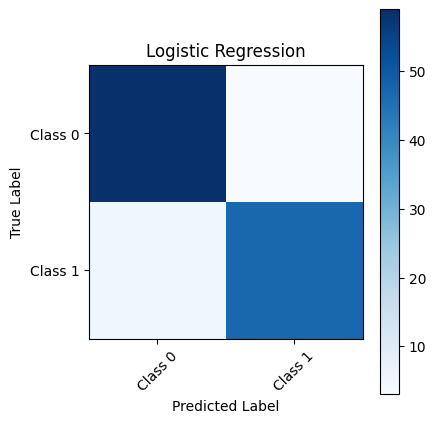

In [25]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelLogistic, XTest, yTest)
plot_confusion_matrix(modelKnn, XTest, yTest)
plot_confusion_matrix(modelDT, XTest, yTest)
print("Árvore de Decisão > KNN > Logística")

